In [6]:
import pm4py
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [7]:
import os
os.getcwd()

'c:\\Users\\flemm\\OneDrive - NORDAKADEMIE\\01_Master MADS23a\\13_WPM_Process Mining\\code-ha-process-mining'

### Daten laden und visualisieren

#### Domestic

In [22]:
import pm4py

In [9]:
# Domestic log in ein pandas DataFrame überführen
df_domestic = pm4py.convert_to_dataframe(log_domestic)

Wie ist der Datensatz grundsätzlich beschaffen bzw. wie viele Zeilen und Spalten gibt es?

In [10]:
print(df_domestic.shape)

(56437, 10)


Wir sehen uns den Domestic-Datensatz als Tabelle an, um ein erstes Gefühl für die Daten zu erhalten.

In [11]:
display(df_domestic)

,id,org:resource,concept:name,time:timestamp,org:role,case:id,case:concept:name,case:BudgetNumber,case:DeclarationNumber,case:Amount
0,st_step 86794_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 09:49:50+00:00,EMPLOYEE,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
1,st_step 86793_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2017-01-09 11:27:48+00:00,SUPERVISOR,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
2,dd_declaration 86791_19,SYSTEM,Request Payment,2017-01-10 09:34:44+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
3,dd_declaration 86791_20,SYSTEM,Payment Handled,2017-01-12 17:31:22+00:00,UNDEFINED,declaration 86791,declaration 86791,budget 86566,declaration number 86792,26.851205
4,st_step 86798_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2017-01-09 10:26:14+00:00,EMPLOYEE,declaration 86795,declaration 86795,budget 86566,declaration number 86796,182.464172
...,...,...,...,...,...,...,...,...,...,...
56432,st_step 138363_0,STAFF MEMBER,Declaration SUBMITTED by EMPLOYEE,2018-12-29 17:50:14+00:00,EMPLOYEE,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56433,st_step 138361_0,STAFF MEMBER,Declaration APPROVED by ADMINISTRATION,2018-12-29 17:56:13+00:00,ADMINISTRATION,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56434,st_step 138362_0,STAFF MEMBER,Declaration FINAL_APPROVED by SUPERVISOR,2019-01-03 08:55:52+00:00,SUPERVISOR,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576
56435,dd_declaration 138359_19,SYSTEM,Request Payment,2019-01-08 08:20:28+00:00,UNDEFINED,declaration 138359,declaration 138359,budget 86566,declaration number 138360,190.404576


Welche Datentypen gibt es und sind NULL-Werte vorhanden?

In [12]:
print(df_domestic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56437 entries, 0 to 56436
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      56437 non-null  object             
 1   org:resource            56437 non-null  object             
 2   concept:name            56437 non-null  object             
 3   time:timestamp          56437 non-null  datetime64[ns, UTC]
 4   org:role                56437 non-null  object             
 5   case:id                 56437 non-null  object             
 6   case:concept:name       56437 non-null  object             
 7   case:BudgetNumber       56437 non-null  object             
 8   case:DeclarationNumber  56437 non-null  object             
 9   case:Amount             56437 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(8)
memory usage: 4.3+ MB
None


Es gibt keine NULL-Werte im Datensatz. Dies ist nur ein Double-Check.

In [13]:
print(df_domestic.isnull().sum())

id                        0
org:resource              0
concept:name              0
time:timestamp            0
org:role                  0
case:id                   0
case:concept:name         0
case:BudgetNumber         0
case:DeclarationNumber    0
case:Amount               0
dtype: int64


Gib mir alle Aktivitäten bzw. Schritte aus, die es grds. im Datensatz gibt.

In [14]:
print(df_domestic["concept:name"].unique())

['Declaration SUBMITTED by EMPLOYEE'
 'Declaration FINAL_APPROVED by SUPERVISOR' 'Request Payment'
 'Payment Handled' 'Declaration APPROVED by PRE_APPROVER'
 'Declaration REJECTED by MISSING' 'Declaration REJECTED by PRE_APPROVER'
 'Declaration REJECTED by EMPLOYEE' 'Declaration SAVED by EMPLOYEE'
 'Declaration REJECTED by SUPERVISOR'
 'Declaration APPROVED by ADMINISTRATION'
 'Declaration APPROVED by BUDGET OWNER'
 'Declaration FOR_APPROVAL by SUPERVISOR'
 'Declaration REJECTED by ADMINISTRATION'
 'Declaration FOR_APPROVAL by PRE_APPROVER'
 'Declaration REJECTED by BUDGET OWNER'
 'Declaration FOR_APPROVAL by ADMINISTRATION']


Zähle, wie viele Aktivitäten bzw. Schritte das sind.

In [15]:
print(len(df_domestic["concept:name"].unique()))

17


In [16]:
# Calculate the frequency of each event
event_frequencies = df_domestic["concept:name"].value_counts()

# Display the frequencies
print(event_frequencies)

concept:name
Declaration SUBMITTED by EMPLOYEE             11531
Declaration FINAL_APPROVED by SUPERVISOR      10131
Payment Handled                               10044
Request Payment                               10040
Declaration APPROVED by ADMINISTRATION         8202
Declaration APPROVED by BUDGET OWNER           2820
Declaration REJECTED by EMPLOYEE               1365
Declaration REJECTED by ADMINISTRATION          952
Declaration APPROVED by PRE_APPROVER            685
Declaration REJECTED by SUPERVISOR              293
Declaration SAVED by EMPLOYEE                   135
Declaration REJECTED by MISSING                  91
Declaration REJECTED by PRE_APPROVER             86
Declaration REJECTED by BUDGET OWNER             59
Declaration FOR_APPROVAL by SUPERVISOR            1
Declaration FOR_APPROVAL by PRE_APPROVER          1
Declaration FOR_APPROVAL by ADMINISTRATION        1
Name: count, dtype: int64


C:\Users\flemm\AppData\Local\Temp\ipykernel_9392\239294233.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_frequencies.values, y=event_frequencies.index, palette="viridis")


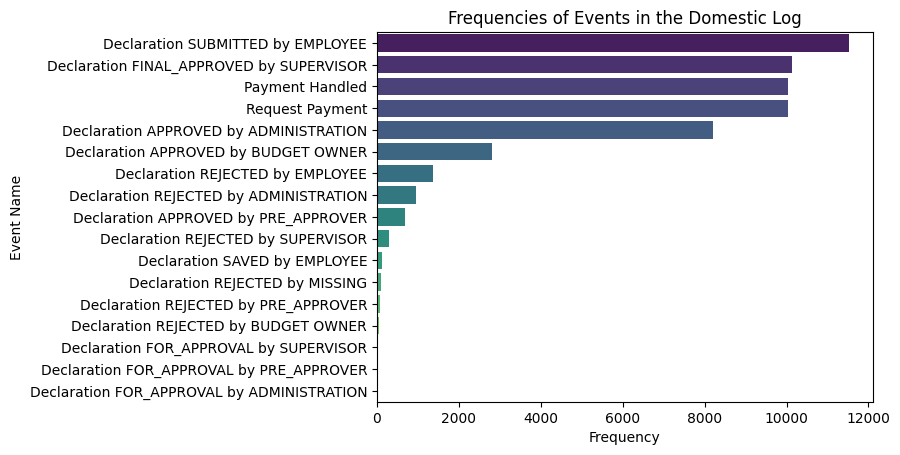

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x=event_frequencies.values, y=event_frequencies.index, palette="viridis")

# Add labels and title
plt.xlabel("Frequency")
plt.ylabel("Event Name")
plt.title("Frequencies of Events in the Domestic Log")
plt.show()

Visualisierung des Petrynetzes

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

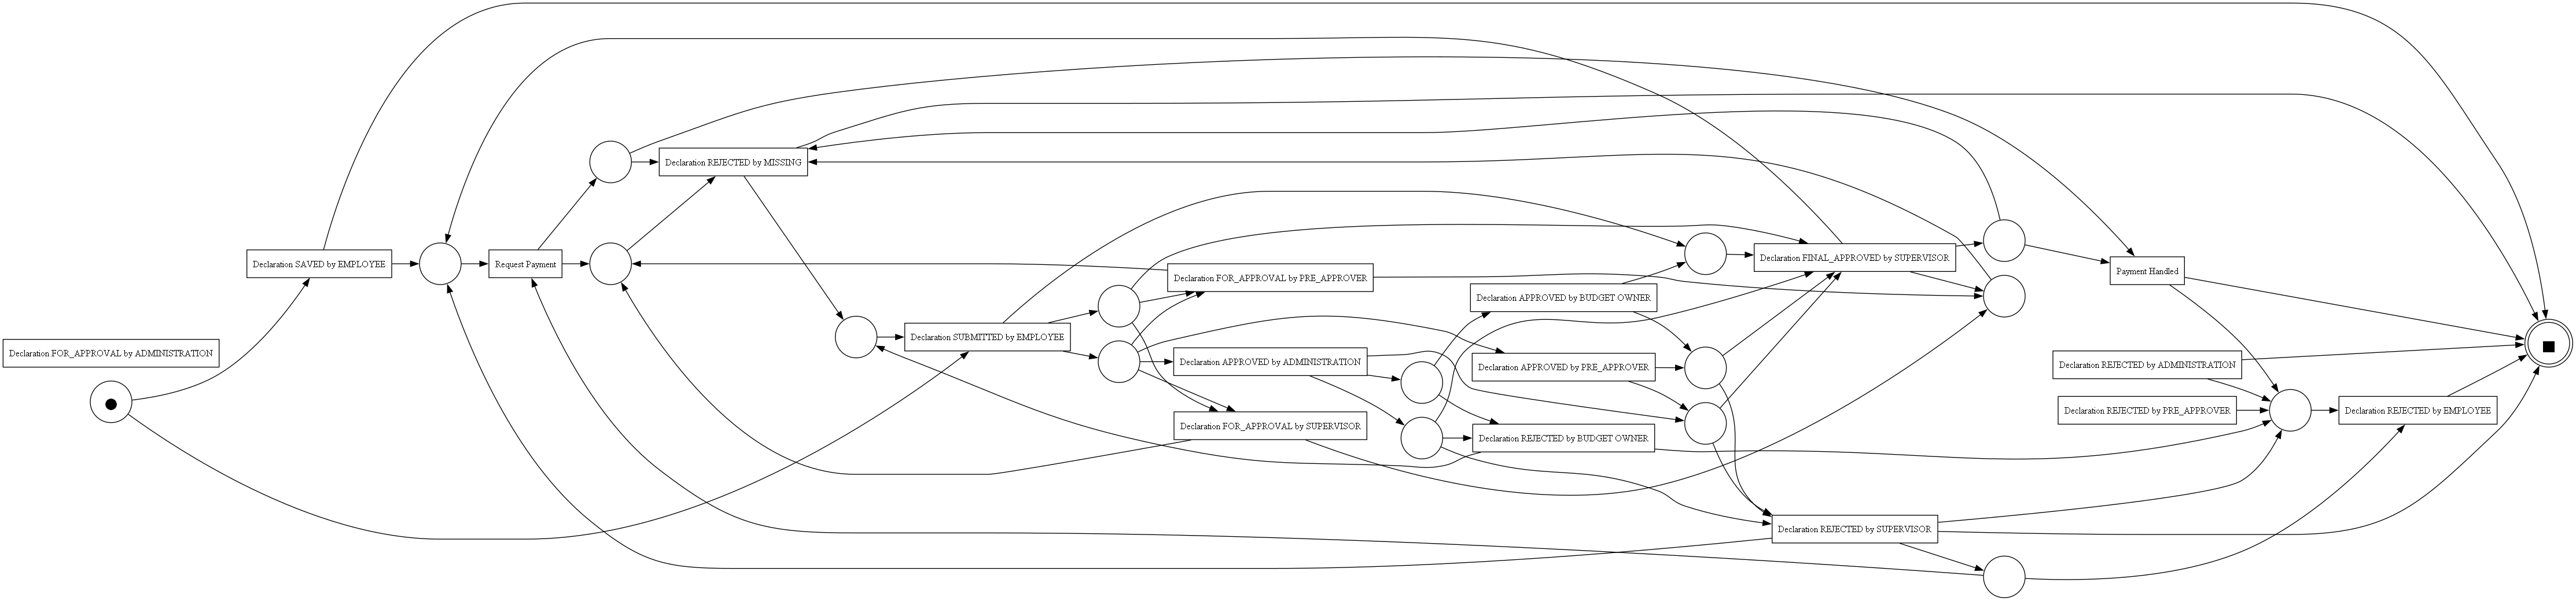

In [23]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Step 1: Load the event log using a relative path
log_domestic = xes_importer.apply('Data/DomesticDeclarations.xes')

# Step 2: Discover the process model using the Alpha Miner algorithm
net, initial_marking, final_marking = alpha_miner.apply(log_domestic)

# Step 3: Visualize the discovered Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

#### International

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

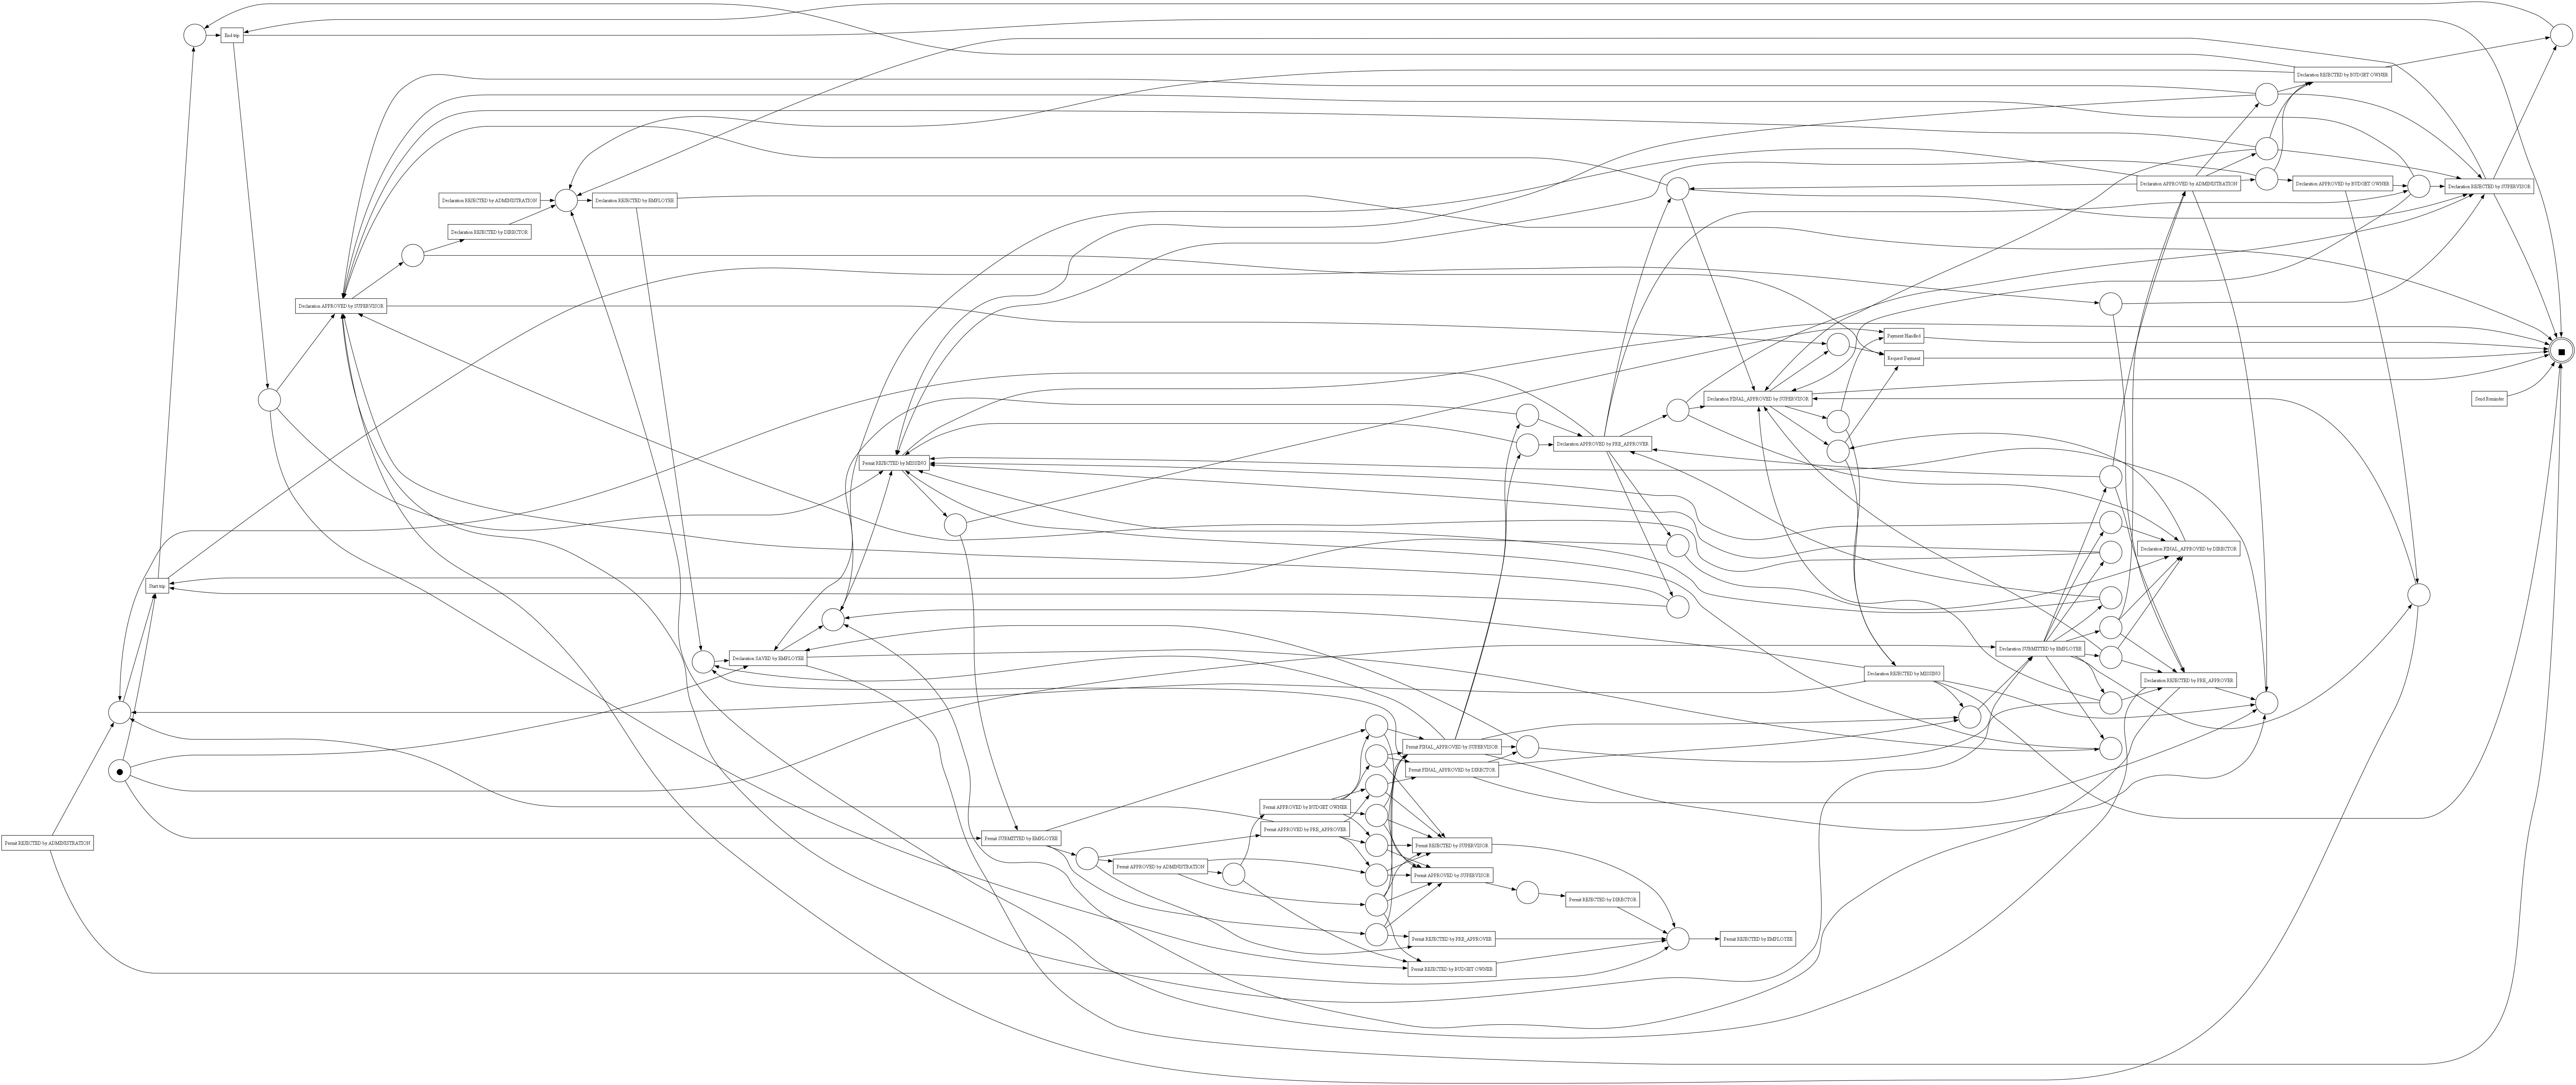

In [21]:
# Step 1: Load the event log using a relative path
log_International = xes_importer.apply('Data/InternationalDeclarations.xes')

# Step 2: Discover the process model using the Alpha Miner algorithm
net, initial_marking, final_marking = alpha_miner.apply(log_International)

# Step 3: Visualize the discovered Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)